In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def mostrar(imagem, imagem_cinza=False):
  fig = plt.gcf()
  fig.set_size_inches(18,6)
  if imagem_cinza:
    plt.imshow(imagem, cmap='gray')
  else:
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB), cmap='gray')
  plt.axis('off')
  plt.show()

In [3]:
img = cv2.imread('cachorro.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

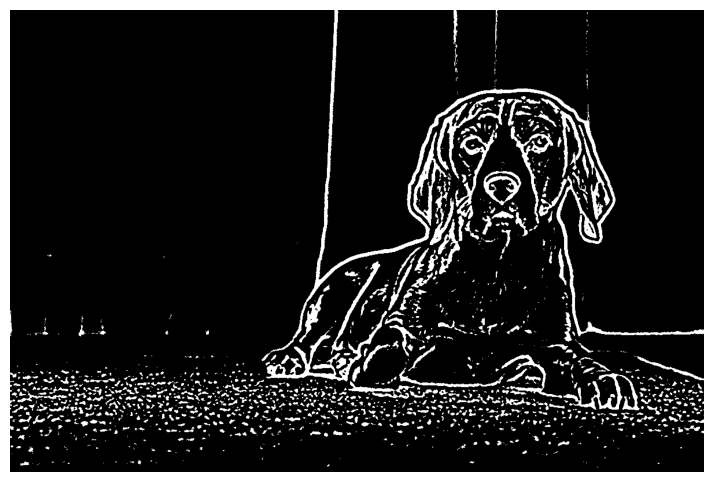

In [4]:
img_processada = img.copy()
desfoque = cv2.GaussianBlur(gray, (7,7), 0)
adapt_gauss = cv2.adaptiveThreshold(desfoque, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
mostrar(adapt_gauss)

In [5]:
kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

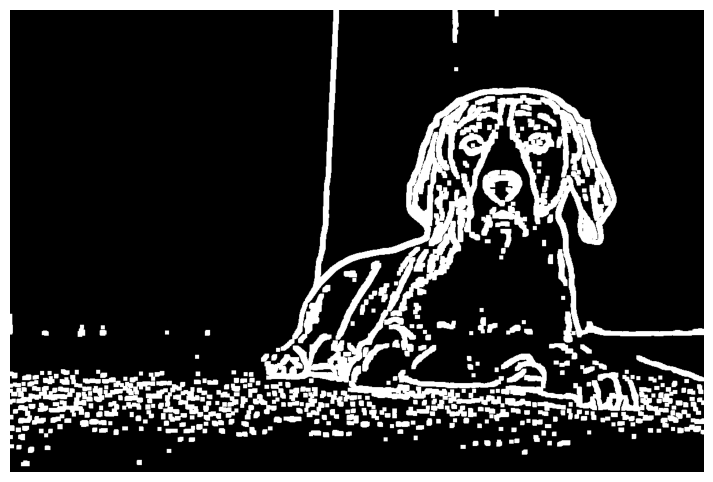

In [6]:
erosao = cv2.erode(adapt_gauss, kernel)
dilatacao = cv2.dilate(erosao, kernel, iterations=3)
mostrar(dilatacao)

In [7]:
elementos = dilatacao.copy()
contornos, hierarquia = cv2.findContours(elementos, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contornos

(array([[[ 23, 780]],
 
        [[ 23, 781]],
 
        [[ 21, 783]],
 
        [[ 19, 783]],
 
        [[ 19, 789]],
 
        [[ 33, 789]],
 
        [[ 33, 781]],
 
        [[ 30, 781]],
 
        [[ 29, 780]]], dtype=int32),
 array([[[220, 779]],
 
        [[219, 780]],
 
        [[219, 786]],
 
        [[220, 787]],
 
        [[227, 787]],
 
        [[227, 779]]], dtype=int32),
 array([[[888, 761]],
 
        [[886, 763]],
 
        [[885, 763]],
 
        [[885, 769]],
 
        [[893, 769]],
 
        [[894, 768]],
 
        [[894, 761]]], dtype=int32),
 array([[[271, 760]],
 
        [[271, 766]],
 
        [[278, 766]],
 
        [[278, 760]]], dtype=int32),
 array([[[ 34, 756]],
 
        [[ 33, 757]],
 
        [[ 32, 757]],
 
        [[ 32, 758]],
 
        [[ 31, 759]],
 
        [[ 31, 766]],
 
        [[ 38, 766]],
 
        [[ 39, 765]],
 
        [[ 40, 765]],
 
        [[ 40, 764]],
 
        [[ 41, 763]],
 
        [[ 41, 757]],
 
        [[ 40, 756]]], dtype=int32),

1155.0
1020.0
1467.0
1176.5
1491.0
1037.0
7858.0
1269.5
1703.0
16385.5
1244.0
3047.5
74553.0


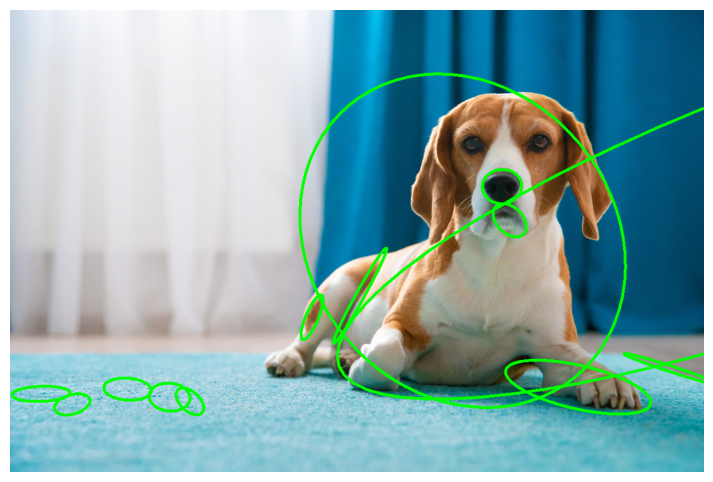

In [8]:
img_processada = img.copy()
for cnt in contornos:
  area = cv2.contourArea(cnt)
  if area >= 1000:
    print(area)
    elipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img_processada, elipse, (0,255,0), 3)
mostrar(img_processada)